# 붓꽃 판별

## 패키지 로딩

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score

import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [4]:
iris = load_iris()
x = iris.data
y = iris.target

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
df = pd.DataFrame(x, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['class'] = y

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['class'].value_counts() # 3개 품종

0    50
1    50
2    50
Name: class, dtype: int64

## 학습 데이터와 평가 데이터 분리

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, stratify= y)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120,), (30,))

In [12]:
print('y의 클래스별 데이터 수: ', np.bincount(y))
# bincount는 value count와 유사한 개념
print('y_train 의 클래스별 데이터 수: ', np.bincount(y_train))
print('y_test 의 클래스별 데이터 수: ', np.bincount(y_test))

#120: 30
#4:1
#80:20

y의 클래스별 데이터 수:  [50 50 50]
y_train 의 클래스별 데이터 수:  [40 40 40]
y_test 의 클래스별 데이터 수:  [10 10 10]


## 모델 생성
- 다항분류를 위한 옵션
    - multi_class: 다중 클래스 분류 문제 상황에서 어떤 접근 방식을 취할지 결정
        - 'ovr': one versus rest -> 이진 분류기인 sigmmoid 함수를 이용해 결과 예측
            - (solver = 'liblinear'은 one versus rest 방식으로 제한된다) 
        - 'multinominal' : 각 클래스에 대한 softmax 확률값으로 다중분류 

In [13]:
model = LogisticRegression(multi_class= 'ovr', max_iter= 2000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

## 모델 예측

In [14]:
y_hat = model.predict(x_test)
prob = model.predict_proba(x_test)

In [15]:
np.set_printoptions(suppress= True, precision =3)

In [16]:
print(prob)

[[0.002 0.337 0.661]
 [0.004 0.294 0.702]
 [0.12  0.868 0.012]
 [0.9   0.1   0.   ]
 [0.774 0.225 0.   ]
 [0.851 0.148 0.   ]
 [0.    0.175 0.825]
 [0.878 0.122 0.   ]
 [0.    0.114 0.886]
 [0.051 0.89  0.059]
 [0.924 0.076 0.   ]
 [0.001 0.412 0.587]
 [0.01  0.637 0.353]
 [0.842 0.158 0.   ]
 [0.769 0.231 0.   ]
 [0.    0.111 0.888]
 [0.002 0.365 0.633]
 [0.014 0.589 0.397]
 [0.847 0.153 0.   ]
 [0.042 0.862 0.096]
 [0.006 0.623 0.371]
 [0.033 0.701 0.267]
 [0.    0.339 0.661]
 [0.    0.477 0.523]
 [0.    0.308 0.692]
 [0.003 0.732 0.264]
 [0.    0.08  0.92 ]
 [0.773 0.227 0.   ]
 [0.903 0.097 0.   ]
 [0.001 0.322 0.676]]


In [17]:
df = pd.DataFrame(prob[:5], columns= ['class - 0', 'class -1', 'class -2'])
#df['result'] = df.max(axis=1)

In [18]:
np.argmax(prob[:5], axis=1)

array([2, 2, 1, 0, 0], dtype=int64)

In [19]:
df['result'] = np.argmax(prob[:5], axis=1) # 가장 큰 값의 인덱스 값
df

,class - 0,class -1,class -2,result
0,0.002244,0.336790,0.660966,2
1,0.004306,0.293660,0.702034,2
2,0.119936,0.867629,0.012435,1
3,0.899787,0.100208,0.000005,0
4,0.774498,0.225495,0.000007,0


## 모델평가

In [20]:
print(f'accuracy: {accuracy_score(y_test, y_hat):.3f}')
print(f"AUC: {roc_auc_score(y_test, prob, multi_class='ovr'):.3f}") 
cf = confusion_matrix(y_test, y_hat)
print(cf)

accuracy: 0.933
AUC: 0.973
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


## 다중 클래스 혼동행렬 시각화

In [21]:
pd.DataFrame(cf, columns = [['predict','predict','predict'],['0','1','2']], index = [['True','True','True'],['0','1','2']] )

predict       
             0  1   2
True 0      10  0   0
     1       0  8   2
     2       0  0  10

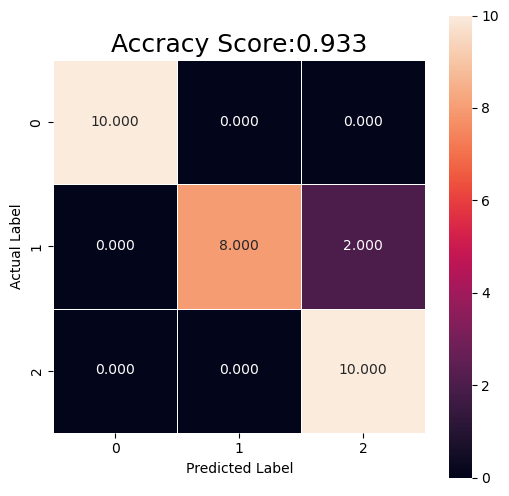

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(cf,annot= True, fmt= '.3f', linewidths=0.5, square= True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Accracy Score:{accuracy_score(y_test, y_hat):.3f}', size = 18)
plt.show()

In [23]:
# 다중 클래스 분류의 경우 average 속성에 집계방식을 지정(macro, micro, weight)
precision = precision_score(y_test, y_hat, average= 'micro')
print(f'Precision: {precision:.3f}')

report = classification_report(y_test, y_hat)
print(report)

Precision: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.80      0.89        10
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')

0.9733333333333333

## 하이퍼 파라메터 튜닝

In [52]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [27]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV
# 하이퍼 파라메터 뿐 아니라 교차검증까지 해줌

model = LogisticRegression()
parameter = {'C':[0.01,0.1,1,3,5,10],
            'penalty': ['l1','12'],
            'solver': ['newton-cg','lbfgs','sag','saga','liblinear'],
            'multi_class': ['ovr', 'multinominal']}

# 'C' : 규제강도(알파)의 역수
# Penalt
#cv 교차 검증 수
# n_jobs : 코어 사용 개수
# -1 : 모든 코어 사용 (default =1 , 하나의 코어만 사용)y
gs = GridSearchCV(model, parameter, cv=5, scoring = 'accuracy') 
gs.fit(x_train, y_train)

print('최적의 파라메터:', gs.best_params_)
print(f'최적 정확도: {gs.best_score_:.3f}')

# 최적의 파라메터: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
# 최적 정확도: 0.975

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

최적의 파라메터: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
최적 정확도: 0.975


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

## 최적 파라메터를 이용한 모델 평가

In [ ]:
# 최적의 파라메터: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [56]:
#best_estimator_ : 최적의 결과를 보여주는 파라메터 조합으로 만들어진 분류모형
gs.best_estimator_

LogisticRegression(C=10, multi_class='ovr', penalty='l1', solver='liblinear')

In [61]:
y_hat = gs.best_estimator_.predict(x_test)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(f"AUC: {roc_auc_score (y_test, gs.best_estimator_.predict_proba(x_test), multi_class='ovr'):.3f}")

정확도: 1.000
AUC: 1.000
